In [1]:
from uncertainties import ufloat
import matplotlib.pyplot as plt
import lmfit
import numpy as np

In [2]:
dmH2O =ufloat(0.80470,0.00643)
dmN2 = ufloat(0.96465,0.00668)
dmO2 = ufloat(1.0053,0.0062)
mzH2O =ufloat(18.1712487,0.01013851)
mzN2 = ufloat(28.0766591,0.00978133)
mzO2 = ufloat(32.0575020,0.01227711)

In [3]:
RH2O= mzH2O/dmH2O
RN2 = mzN2/dmN2
RO2 = mzO2/dmO2

print(RH2O)
print(RN2)
print(RO2)

22.58+/-0.18
29.11+/-0.20
31.89+/-0.20


<ErrorbarContainer object of 3 artists>

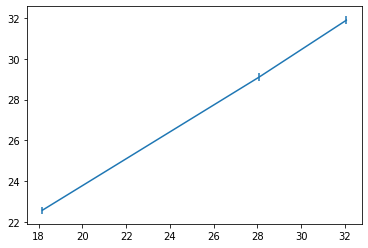

In [4]:
mz = [[mzH2O.n,mzN2.n,mzO2.n],[mzH2O.s,mzN2.s,mzO2.s]]
R = [[RH2O.n,RN2.n,RO2.n],[RH2O.s,RN2.s,RO2.s]]
plt.errorbar(x = mz[0],y=R[0],xerr=mz[1],yerr=R[1])

In [5]:
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=R[0],x=mz[0])
out_lin =  model_lin.fit(R[0],x=mz[0],params=pars_lin,nan_policy='propagate',weights=1/np.array(R[1]))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 3
    # variables        = 2
    chi-square         = 0.20877276
    reduced chi-square = 0.20877276
    Akaike info crit   = -3.99536350
    Bayesian info crit = -5.79813892
[[Variables]]
    slope:      0.66784021 +/- 0.00846810 (1.27%) (init = 0.6680205)
    intercept:  10.4288540 +/- 0.22266434 (2.14%) (init = 10.42194)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.974


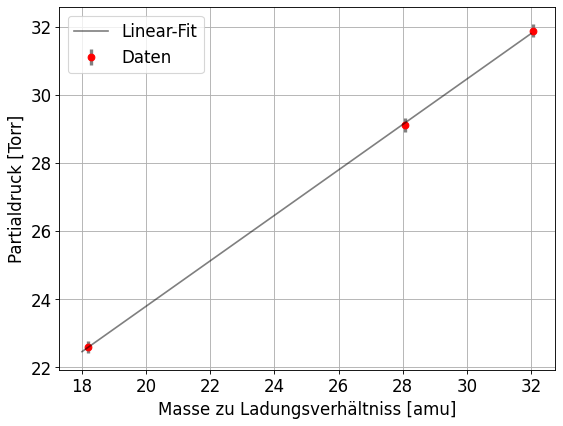

In [6]:
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.rc ('font', size = 15) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 15) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 15) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 15) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 15) #Schriftgröße der Legende

plt.errorbar(mz[0],R[0],yerr=R[1],fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(18,32,0.01),out_lin.eval(x=np.arange(18,32,0.01)),zorder=10,color='k',linestyle='-',alpha=0.5,label="Linear-Fit")



plt.xlabel('Masse zu Ladungsverhältniss [amu]')
plt.ylabel('Partialdruck [Torr]')
plt.grid()
plt.legend()
plt.savefig('Results/lin_fit.pdf')
print(out_lin.fit_report())